# Explore CM1 Dataset

## Detail about CM1

CM1 is a NASA spacecraft instrument (data collection and processing) written in “C”. At various times, researchers have negotiated access to the CM source code.

## Some guidelines

1. Look at the raw data
1. Load dataset
1. Summarize the dataset 
1. Correlation between attributes
1. Skewed of univariate distribution
1. Data visualization

### Look at the raw data 

In [3]:
!head -5 NASADefectDataset/OriginalData/csv/cm1.csv

id,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,DESIGN_COMPLEXITY,DESIGN_DENSITY,EDGE_COUNT,ESSENTIAL_COMPLEXITY,ESSENTIAL_DENSITY,LOC_EXECUTABLE,PARAMETER_COUNT,GLOBAL_DATA_COMPLEXITY,GLOBAL_DATA_DENSITY,HALSTEAD_CONTENT,HALSTEAD_DIFFICULTY,HALSTEAD_EFFORT,HALSTEAD_ERROR_EST,HALSTEAD_LENGTH,HALSTEAD_LEVEL,HALSTEAD_PROG_TIME,HALSTEAD_VOLUME,MAINTENANCE_SEVERITY,MODIFIED_CONDITION_COUNT,MULTIPLE_CONDITION_COUNT,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PATHOLOGICAL_COMPLEXITY,PERCENT_COMMENTS,LOC_TOTAL,Defective
1,6,9,2,1,0,16,5,0.2,8,2,3,0.6,17,1,0,24,3,0,0,32.54,9.5,2936.77,0.1,63,0.11,163.15,309.13,0.2,4,8,14,0.16,19,44,15,15,32,1,4,25,N
2,15,7,3,1,19,12,4,0.13,6,2,2,0.5,17,1,0,31,1,0,0,38.55,21.52,17846.19,0.28,141,0.05,991.46,829.45,0.25,3,6,15,0.06,51,90,32,27,67,1,39.22,32,Y
3,27,9,1,4,

### Load dataset

In [4]:
import pandas as pd

filename = "cm1.csv"
relativepath = 'NASADefectDataset/OriginalData/csv/'

#Get the column header from the csv file
colnames = pd.read_csv(relativepath+filename, nrows=1)

#Set the preferred max_columns of the output
pd.set_option('display.max_columns', 8)        
print(colnames)

#Read everything omitting the 'id' column
data = pd.read_csv(relativepath+filename, usecols = [i for i in colnames if i != 'id'])
peek = data.head(5)
peek

   id  LOC_BLANK  BRANCH_COUNT  CALL_PAIRS    ...      \
0   1          6             9           2    ...       

   PATHOLOGICAL_COMPLEXITY  PERCENT_COMMENTS  LOC_TOTAL  Defective  
0                        1                 4         25          N  

[1 rows x 42 columns]


,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,...,PATHOLOGICAL_COMPLEXITY,PERCENT_COMMENTS,LOC_TOTAL,Defective
0,6,9,2,1,...,1,4.00,25,N
1,15,7,3,1,...,1,39.22,32,Y
2,27,9,1,4,...,1,47.27,33,Y
3,1,1,2,0,...,1,0.00,7,N
4,7,3,2,0,...,1,0.00,12,N


### Summarize the dataset

1. Dimension
1. Data type
1. Missing values in the attributes
1. Descriptive statistics
1. Number of instances for the Defective attribute

In [5]:
# Dimension
# Get how many instances (rows) and how many attributes (columns) are contained in the data
print(data.shape)

(505, 41)


In [6]:
# Data Type
print(data.dtypes)

LOC_BLANK                            int64
BRANCH_COUNT                         int64
CALL_PAIRS                           int64
LOC_CODE_AND_COMMENT                 int64
LOC_COMMENTS                         int64
CONDITION_COUNT                      int64
CYCLOMATIC_COMPLEXITY                int64
CYCLOMATIC_DENSITY                 float64
DECISION_COUNT                       int64
DECISION_DENSITY                    object
DESIGN_COMPLEXITY                    int64
DESIGN_DENSITY                     float64
EDGE_COUNT                           int64
ESSENTIAL_COMPLEXITY                 int64
ESSENTIAL_DENSITY                  float64
LOC_EXECUTABLE                       int64
PARAMETER_COUNT                      int64
GLOBAL_DATA_COMPLEXITY               int64
GLOBAL_DATA_DENSITY                  int64
HALSTEAD_CONTENT                   float64
HALSTEAD_DIFFICULTY                float64
HALSTEAD_EFFORT                    float64
HALSTEAD_ERROR_EST                 float64
HALSTEAD_LE

In [7]:
# Identify missing values in any columns
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 41 columns):
LOC_BLANK                          505 non-null int64
BRANCH_COUNT                       505 non-null int64
CALL_PAIRS                         505 non-null int64
LOC_CODE_AND_COMMENT               505 non-null int64
LOC_COMMENTS                       505 non-null int64
CONDITION_COUNT                    505 non-null int64
CYCLOMATIC_COMPLEXITY              505 non-null int64
CYCLOMATIC_DENSITY                 505 non-null float64
DECISION_COUNT                     505 non-null int64
DECISION_DENSITY                   505 non-null object
DESIGN_COMPLEXITY                  505 non-null int64
DESIGN_DENSITY                     505 non-null float64
EDGE_COUNT                         505 non-null int64
ESSENTIAL_COMPLEXITY               505 non-null int64
ESSENTIAL_DENSITY                  505 non-null float64
LOC_EXECUTABLE                     505 non-null int64
PARAMETER_COUNT         

In [8]:
# Descriptive Statistics
#Set the preferred max_columns of the output
pd.set_option('display.max_columns', 4)    
#Set the precision of the output
pd.set_option('precision', 3)

# Look at a summary of each attribute
print(data.describe())

       LOC_BLANK  BRANCH_COUNT    ...      PERCENT_COMMENTS  LOC_TOTAL
count    505.000       505.000    ...               505.000    505.000
mean      11.713         8.931    ...                25.167     33.471
std       19.946        14.656    ...                20.359     48.810
min        0.000         1.000    ...                 0.000      2.000
25%        1.000         1.000    ...                 2.000      9.000
50%        5.000         5.000    ...                25.000     19.000
75%       13.000         9.000    ...                42.550     36.000
max      164.000       162.000    ...                84.210    503.000

[8 rows x 39 columns]


In [9]:
# Look at the number of instances (rows) that belong to each Defective
print(data.groupby('Defective').size())

Defective
N    457
Y     48
dtype: int64


### Correlation between attributes

1. Pearson
1. Spearman
1. Kendall

In [10]:
#Set the preferred max_columns of the output
pd.set_option('display.max_columns', 6)    
#Set the precision of the output
pd.set_option('precision', 3)
pcorrelations = data.corr(method='pearson')
pcorrelations

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,...,PATHOLOGICAL_COMPLEXITY,PERCENT_COMMENTS,LOC_TOTAL
LOC_BLANK,1.000,0.686,0.619,...,NaN,0.346,0.716
BRANCH_COUNT,0.686,1.000,0.670,...,NaN,0.210,0.958
CALL_PAIRS,0.619,0.670,1.000,...,NaN,0.307,0.729
LOC_CODE_AND_COMMENT,0.694,0.755,0.507,...,NaN,0.363,0.765
LOC_COMMENTS,0.604,0.810,0.678,...,NaN,0.402,0.842
CONDITION_COUNT,0.664,0.973,0.632,...,NaN,0.226,0.923
CYCLOMATIC_COMPLEXITY,0.684,0.992,0.673,...,NaN,0.196,0.956
CYCLOMATIC_DENSITY,-0.111,0.042,-0.138,...,NaN,-0.160,-0.127
DECISION_COUNT,0.665,0.963,0.626,...,NaN,0.227,0.917
DESIGN_COMPLEXITY,0.648,0.928,0.719,...,NaN,0.151,0.922


In [42]:
scorrelations = data.corr(method='spearman')
scorrelations

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,...,PATHOLOGICAL_COMPLEXITY,PERCENT_COMMENTS,LOC_TOTAL
LOC_BLANK,1.000,0.689,0.665,...,NaN,0.569,0.761
BRANCH_COUNT,0.689,1.000,0.702,...,NaN,0.323,0.895
CALL_PAIRS,0.665,0.702,1.000,...,NaN,0.386,0.754
LOC_CODE_AND_COMMENT,0.661,0.614,0.493,...,NaN,0.646,0.646
LOC_COMMENTS,0.705,0.586,0.655,...,NaN,0.810,0.663
CONDITION_COUNT,0.688,0.978,0.692,...,NaN,0.334,0.871
CYCLOMATIC_COMPLEXITY,0.687,0.999,0.699,...,NaN,0.319,0.896
CYCLOMATIC_DENSITY,-0.175,0.162,-0.140,...,NaN,-0.129,-0.248
DECISION_COUNT,0.694,0.969,0.695,...,NaN,0.338,0.870
DESIGN_COMPLEXITY,0.648,0.841,0.835,...,NaN,0.270,0.810


In [11]:
kcorrelations = data.corr(method='kendall')
kcorrelations

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,...,PATHOLOGICAL_COMPLEXITY,PERCENT_COMMENTS,LOC_TOTAL
LOC_BLANK,1.000,0.549,0.535,...,NaN,0.418,0.602
BRANCH_COUNT,0.549,1.000,0.583,...,NaN,0.235,0.768
CALL_PAIRS,0.535,0.583,1.000,...,NaN,0.288,0.602
LOC_CODE_AND_COMMENT,0.529,0.498,0.401,...,NaN,0.507,0.503
LOC_COMMENTS,0.560,0.470,0.529,...,NaN,0.634,0.513
CONDITION_COUNT,0.545,0.947,0.574,...,NaN,0.245,0.739
CYCLOMATIC_COMPLEXITY,0.548,0.992,0.582,...,NaN,0.232,0.771
CYCLOMATIC_DENSITY,-0.124,0.119,-0.105,...,NaN,-0.090,-0.186
DECISION_COUNT,0.554,0.930,0.579,...,NaN,0.249,0.743
DESIGN_COMPLEXITY,0.520,0.764,0.730,...,NaN,0.201,0.680


### Skewed of univariate distributions

In [12]:
skew = data.skew()
print(skew)

LOC_BLANK                           4.067
BRANCH_COUNT                        5.296
CALL_PAIRS                          2.558
LOC_CODE_AND_COMMENT                4.595
LOC_COMMENTS                        6.359
CONDITION_COUNT                     4.818
CYCLOMATIC_COMPLEXITY               5.764
CYCLOMATIC_DENSITY                  1.307
DECISION_COUNT                      4.723
DESIGN_COMPLEXITY                   5.316
DESIGN_DENSITY                     -0.936
EDGE_COUNT                          4.579
ESSENTIAL_COMPLEXITY                4.229
ESSENTIAL_DENSITY                   1.909
LOC_EXECUTABLE                      4.880
PARAMETER_COUNT                     2.975
GLOBAL_DATA_COMPLEXITY              0.000
GLOBAL_DATA_DENSITY                 0.000
HALSTEAD_CONTENT                    2.667
HALSTEAD_DIFFICULTY                 2.592
HALSTEAD_EFFORT                    11.320
HALSTEAD_ERROR_EST                  4.919
HALSTEAD_LENGTH                     4.007
HALSTEAD_LEVEL                    

### Data visualization

1. box
1. hist

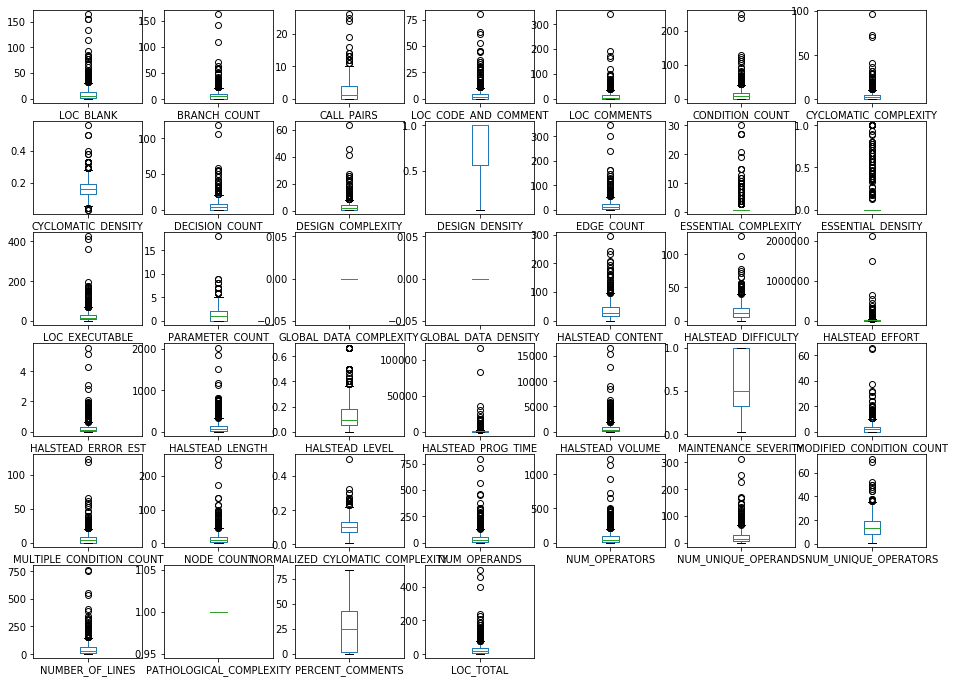

In [14]:
import matplotlib.pyplot as plt
# Univariate plots of each individual variable
# box with whisker
data.plot(kind='box', subplots=True, layout=(8,7),  sharex=False, sharey=False)
plt.rcParams["figure.figsize"] = [16,16]
plt.show()

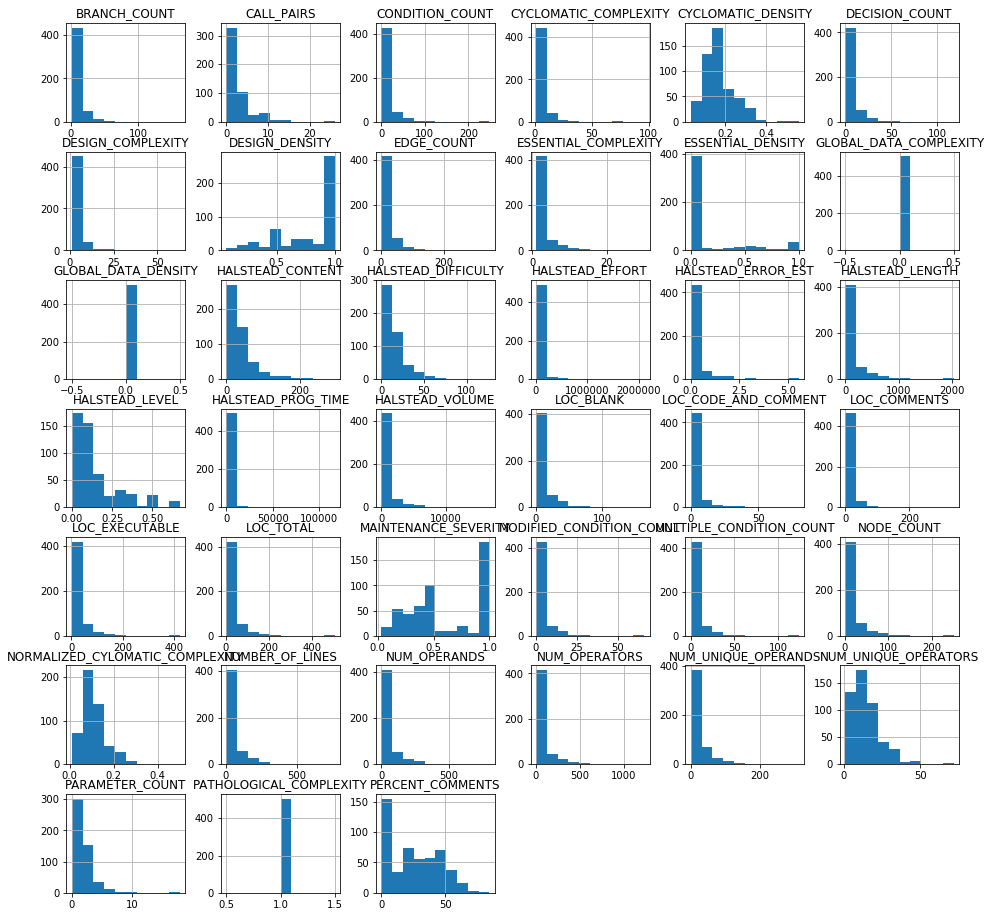

In [15]:
# Univariate plots of each individual variable
# hist
data.hist()
plt.rcParams["figure.figsize"] = [16,16]
plt.show()

In [ ]:
# Multivariate plots to look at the interactions between the variables
pd.scatter_matrix(data) 
plt.show()

C:\Program Files\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  
